In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv("iris-data.csv")
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Minimum sepal length looks dubious. 

There are also some null values in petal_width

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris["class"].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Suspect that "Iris-setossa" is a misspelling of "Iris-setosa"

I also think that "versicolor" and "Iris-versicolor" are the same

This would make sense as then you would have 50 of each

In [6]:
iris["class"].replace({"Iris-setossa": "Iris-setosa", "versicolor":"Iris-versicolor"}, inplace = True)
iris["class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [7]:
iris.nsmallest(10, "sepal_length_cm")

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
77,0.067,3.0,5.0,1.7,Iris-versicolor
8,4.400,2.9,1.4,NaN,Iris-setosa
38,4.400,3.0,1.3,0.2,Iris-setosa
42,4.400,3.2,1.3,0.2,Iris-setosa
41,4.500,2.3,1.3,0.3,Iris-setosa
3,4.600,3.1,1.5,0.2,Iris-setosa


I have a feeling that the 3 smallest are all measured in m instead of cm. Will multiply by 100. 

The width and petals all look normal so it's unlikely to be an odd specimen. Though measuring the length in m and width in cm is a weird mistake to make. 

Also worth noting that these are 5 records togther giving some credence to them having the same data entry issue rather than random chance. Finally. All measurements are to 2SF which matches the rest. Unlikely that these 5 have been measured to the nearest 10 microns. 

In [8]:
iris["sepal_length_cm"] = iris["sepal_length_cm"].apply(lambda x: 100*x if x<0.5 else x)

In [9]:
iris[77:82]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,6.7,3.0,5.0,1.7,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor


In [10]:
iris[iris["petal_width_cm"].isna()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


Identified that this is again a set of continuous records with missing values. 

Could drop them but would be nice to keep them if possible. Will investigate. 

In [11]:
iris.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.103578,0.850576,0.797093
sepal_width_cm,-0.103578,1.000000,-0.419796,-0.348464
petal_length_cm,0.850576,-0.419796,1.000000,0.958934
petal_width_cm,0.797093,-0.348464,0.958934,1.000000


In [12]:
iris[iris["class"]=="Iris-setosa"].corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.660905,0.094265,0.157609
sepal_width_cm,0.660905,1.000000,0.176695,0.264764
petal_length_cm,0.094265,0.176695,1.000000,0.332553
petal_width_cm,0.157609,0.264764,0.332553,1.000000


While there is a very strong correlation between petal length and petal width for all flowers, when looking specifically at Iris-setosa, this correlation breaks down. 

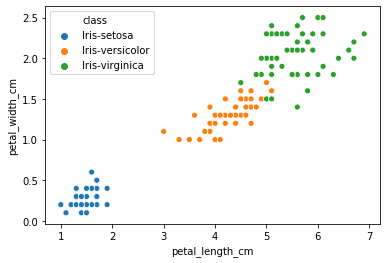

In [13]:
sns.scatterplot("petal_length_cm", "petal_width_cm", "class", data=iris)

The scatterplot shows the relationship between petal length and width. With all the data, there is a clear trend however, when looking only at the setosa, these are much smaller plants. 

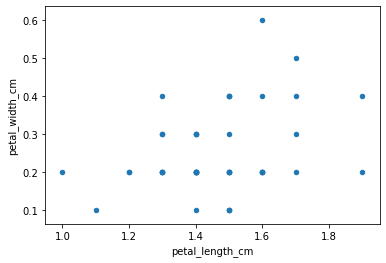

In [14]:
iris[iris["class"]=="Iris-setosa"].plot.scatter("petal_length_cm", "petal_width_cm")

Looking closer at the setosa, there is far less correlation visible. Measurement accuracy is also fairly poor for plants of this size with only 1SF. 

I see 3 options to deal with the missing values:

1. Take the mean value for iris setosa and replace all the nan values with that value. 
2. Attempt to calculate the likely value from the correlation with petal length. This may work or may be very detrimental depending on the analysis to be done on this data. 
3. Remove the missing values. This would mean that you no longer have 50 of each flower. It's also a loss of 10% of your data for setosas. 

Which choice I would go with would be dependent on the analysis I expected to run on the data and the conclusions I hoped to draw. 

In this case, with no idea what analysis will be done, I shall drop the data. 

In [15]:
iris.dropna(inplace=True)
iris.reset_index(inplace=True, drop=True)

In [16]:
iris.to_csv("iris_clean.csv")